In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def analytisk(N, t, c):
    return N * (1. + np.exp(-2 * c * t)) / 2.

In [69]:
def simulasjon(n_lopper, n_hopp):
    n_hund_a = np.zeros(n_hopp)
    n_hund_a[0] = n_lopper

    loppested = np.ones(n_lopper)  # Alle loppene starter på hund A (som har verdi 1)
    loppe_hopp = np.random.randint(0, n_lopper, size=n_hopp)

    for hopp in range(1, n_hopp):
        
        if loppested[loppe_hopp[hopp]]:  # Hopp A -> B
            loppested[loppe_hopp[hopp]] = 0
            n_hund_a[hopp] = n_hund_a[hopp-1] - 1
        
        else:
            loppested[loppe_hopp[hopp]] = 1  # Hopp B -> A
            n_hund_a[hopp] = n_hund_a[hopp-1] + 1

    n_hund_b = np.full(shape=n_hopp, fill_value=n_lopper) - n_hund_a  # NB = N - NA

    return n_hund_a, n_hund_b

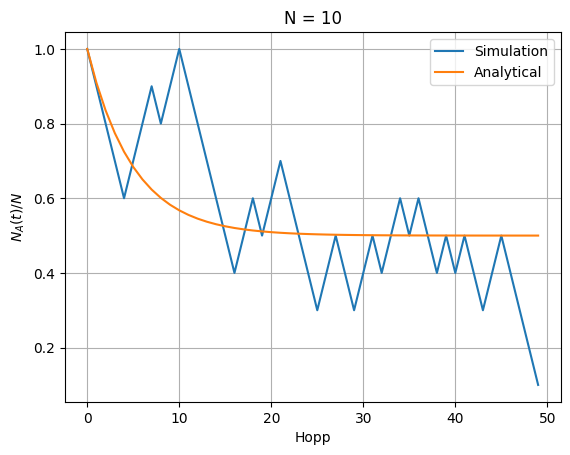

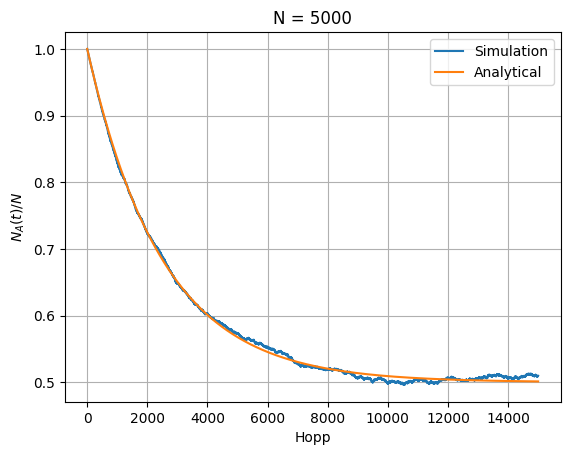

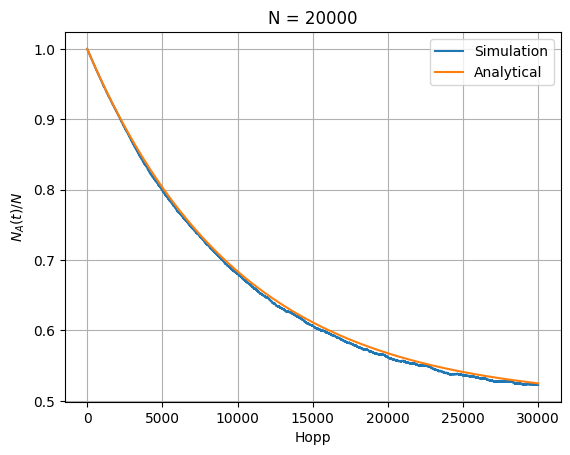

In [72]:
for n, n_hopp in zip((10, 5_000, 20_000), (50, 15_000, 30_000)):
    n_hund_a, _ = simulasjon(n, n_hopp)
    tp = np.arange(n_hopp)
    plt.plot(tp, n_hund_a/n, label='Simulation')
    plt.plot(tp, analytisk(n, tp, c=1/n)/n, label='Analytical')
    plt.xlabel('Hopp')
    plt.ylabel('$N_{A}(t)/N$')
    plt.title(f'N = {n}')
    plt.legend()
    plt.grid()
    plt.show()